In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [130]:
# Extracting the zip folder

!unzip '/content/drive/MyDrive/Dataset/Forest.zip'

Archive:  /content/drive/MyDrive/Dataset/Forest.zip
   creating: Forest Fire Dataset/Testing/fire/
  inflating: Forest Fire Dataset/Testing/fire/fire_0002.jpg  
  inflating: Forest Fire Dataset/Testing/fire/fire_0015.jpg  
  inflating: Forest Fire Dataset/Testing/fire/fire_0027.jpg  
  inflating: Forest Fire Dataset/Testing/fire/fire_0038.jpg  
  inflating: Forest Fire Dataset/Testing/fire/fire_0040.jpg  
  inflating: Forest Fire Dataset/Testing/fire/fire_0048.jpg  
  inflating: Forest Fire Dataset/Testing/fire/fire_0063.jpg  
  inflating: Forest Fire Dataset/Testing/fire/fire_0072.jpg  
  inflating: Forest Fire Dataset/Testing/fire/fire_0084.jpg  
  inflating: Forest Fire Dataset/Testing/fire/fire_0091.jpg  
  inflating: Forest Fire Dataset/Testing/fire/fire_0097.jpg  
  inflating: Forest Fire Dataset/Testing/fire/fire_0107.jpg  
  inflating: Forest Fire Dataset/Testing/fire/fire_0124.jpg  
  inflating: Forest Fire Dataset/Testing/fire/fire_0139.jpg  
  inflating: Forest Fire Dataset/

# Data Augmentation

It is a technique used to increase the image with some modification. To overcome overfitting we are using augmentation.

In [131]:
# Import required lib

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [132]:
# Initializing augmentation for training variable

train_datagen = ImageDataGenerator(rescale=1/255,
                                   zoom_range=0.2,shear_range=0.2,rotation_range=180,
                                   horizontal_flip=True)

In [134]:
# Initializing augmentation for testing variable

test_datagen = ImageDataGenerator(rescale=1/255)

In [142]:
# Passing training data for training variable (augmentation)

xtrain = train_datagen.flow_from_directory('/content/Forest Fire Dataset/Training',
                                           target_size=(150,150),
                                           class_mode='binary',
                                           batch_size=32)

Found 1520 images belonging to 2 classes.


In [141]:
# Passing testing data for testing variable (augmentation)

xtest = test_datagen.flow_from_directory('/content/Forest Fire Dataset/Testing',
                                           target_size=(150,150),
                                           class_mode='binary',
                                           batch_size=32)

Found 380 images belonging to 2 classes.


# CNN Model

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [144]:
# CNN block 

model = Sequential() # Initializing sequential model 
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(150,150,3))) # Convolution layer 
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer 
model.add(Flatten()) # Flatten layer 
model.add(Dense(100,activation='relu')) # Hidden layer
model.add(Dense(1,activation='sigmoid')) # Output layer 

In [145]:
# Compile model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [157]:
# Training model

model.fit_generator(xtrain,steps_per_epoch=len(xtrain),epochs=10,validation_data=xtest,validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
48/48 [==============================] - 11s 230ms/step - loss: 0.1430 - accuracy: 0.9428 - val_loss: 0.1455 - val_accuracy: 0.9474
Epoch 2/10
48/48 [==============================] - 11s 227ms/step - loss: 0.1364 - accuracy: 0.9539 - val_loss: 0.1512 - val_accuracy: 0.9500
Epoch 3/10
48/48 [==============================] - 11s 226ms/step - loss: 0.1295 - accuracy: 0.9579 - val_loss: 0.1599 - val_accuracy: 0.9500
Epoch 4/10
48/48 [==============================] - 11s 226ms/step - loss: 0.1749 - accuracy: 0.9414 - val_loss: 0.1906 - val_accuracy: 0.9316
Epoch 5/10
48/48 [==============================] - 11s 226ms/step - loss: 0.1210 - accuracy: 0.9605 - val_loss: 0.1626 - val_accuracy: 0.9500
Epoch 6/10
48/48 [==============================] - 11s 227ms/step - loss: 0.1360 - accuracy: 0.9513 - val_loss: 0.1500 - val_accuracy: 0.9500
Epoch 7/10
48/48 [==============================] - 11s 224ms/step - loss: 0.1356 - accuracy: 0.9507 - val_loss: 0.1790 - val_accuracy: 0.9368

In [147]:
# Save model

model.save('Forest_fire.h5')

# Testing model

In [163]:
from tensorflow.keras.preprocessing import image  # Importing req. lib
import numpy as np


In [164]:
xtrain.class_indices

{'fire': 0, 'nofire': 1}

1/1 [==============================] - 0s 16ms/step
fire


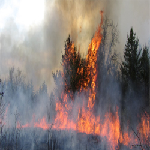

In [182]:
img = image.load_img('/content/Forest Fire Dataset/Testing/fire/fire_0275.jpg',target_size=(150,150))

x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = model.predict(x)
if(pred==0):
  print('fire')
else:
  print('no fire')
img

1/1 [==============================] - 0s 17ms/step
NO FIRE


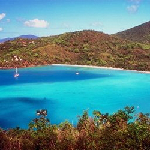

In [183]:
img = image.load_img('/content/Forest Fire Dataset/Testing/nofire/nofire_0010.jpg',target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = (model.predict(x))
if(pred==0):
  print('FIRE')
else:
  print('NO FIRE')
img

1/1 [==============================] - 0s 15ms/step
FIRE


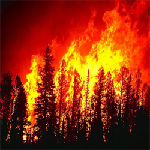

In [186]:
img = image.load_img('/content/Forest Fire Dataset/Testing/fire/fire_0910.jpg',target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = (model.predict(x))
if(pred==0):
  print('FIRE')
else:
  print('NO FIRE')
img

1/1 [==============================] - 0s 17ms/step
NO FIRE


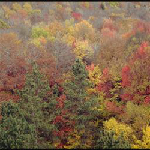

In [181]:
img = image.load_img('/content/Forest Fire Dataset/Testing/nofire/nofire_0051.jpg',target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = (model.predict(x))
if(pred==0):
  print('FIRE')
else:
  print('NO FIRE')
img

1/1 [==============================] - 0s 16ms/step
NO FIRE


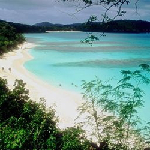

In [180]:
img = image.load_img('/content/Forest Fire Dataset/Testing/nofire/nofire_0006.jpg',target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = (model.predict(x))
if(pred==0):
  print('FIRE')
else:
  print('NO FIRE')
img